In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

branca 0.8.0 requires jinja2>=3, but you'll have jinja2 2.10.1 which is incompatible.
You should consider upgrading via the 'C:\Users\lenovo\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import folium as fl

In [28]:
df = pd.read_csv('E:///listings_clean.csv')
df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood_cleansed,...,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,0,within an hour,100.0,True,1.0,1.0,NaN,NaN,North Holland,Oostelijk Havengebied - Indische Buurt,...,10.0,10.0,9.0,10.0,False,True,False,strict_14_with_grace_period,False,False
1,1,within an hour,100.0,False,1.0,1.0,NaN,NaN,Noord-Holland,Westerpark,...,9.0,10.0,9.0,9.0,False,False,False,moderate,False,False
2,2,within a few hours,100.0,False,2.0,2.0,NaN,NaN,North Holland,Centrum-Oost,...,10.0,9.0,10.0,9.0,False,False,False,strict_14_with_grace_period,False,False
3,3,within a few hours,100.0,False,2.0,2.0,NaN,NaN,North Holland,Centrum-West,...,10.0,10.0,10.0,10.0,False,False,False,strict_14_with_grace_period,False,False
4,4,within an hour,100.0,True,1.0,1.0,NaN,NaN,North Holland,Centrum-West,...,10.0,10.0,10.0,10.0,False,True,False,strict_14_with_grace_period,False,False


In [29]:
df.drop(['Unnamed: 0','host_has_profile_pic','host_identity_verified','is_business_travel_ready','requires_license','has_availability','host_total_listings_count'], axis=1, inplace=True)

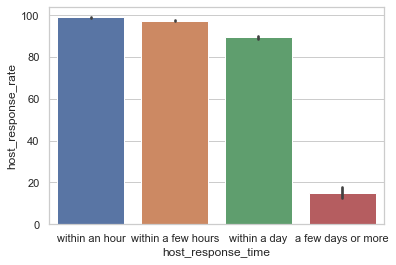

In [72]:
sns.set_style("whitegrid")
ax = sns.barplot(x="host_response_time", y="host_response_rate", data=df)

Most of the hosts who do respond seem to take less time to give a reply to potential customers. Those hosts who take a few days or more to respond are less likely to get in touch with any guests!

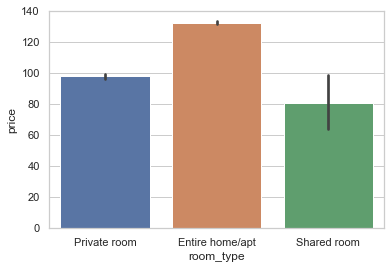

In [82]:
ax = sns.barplot(x="room_type", y="price", data=df)

Homes and apartment type rooms are more popular! Shared accommodation is least preferred.

In [70]:
df['host_response_time'].value_counts()

within an hour        3882
within a few hours    2004
within a day          1786
a few days or more     221
Name: host_response_time, dtype: int64

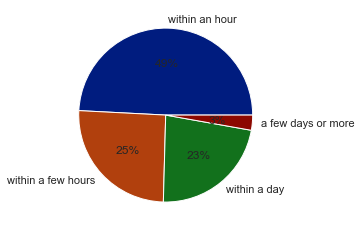

In [78]:
palette_color = sns.color_palette('dark') 
  
dat = [3882,2004,1786,221]
lab = ['within an hour','within a few hours', 'within a day', 'a few days or more']
# plotting data on chart 
plt.pie(dat, labels=lab, colors=palette_color, autopct='%.0f%%') 

# displaying chart 
plt.show()

In [83]:
#see the average amount of minifigs per theme
df_property_average = df.groupby('property_type')['price'].mean()

#sort high to low
df_property_average = df_property_average.sort_values()

Text(0.5, 1.0, 'Average Price by Type of Property')

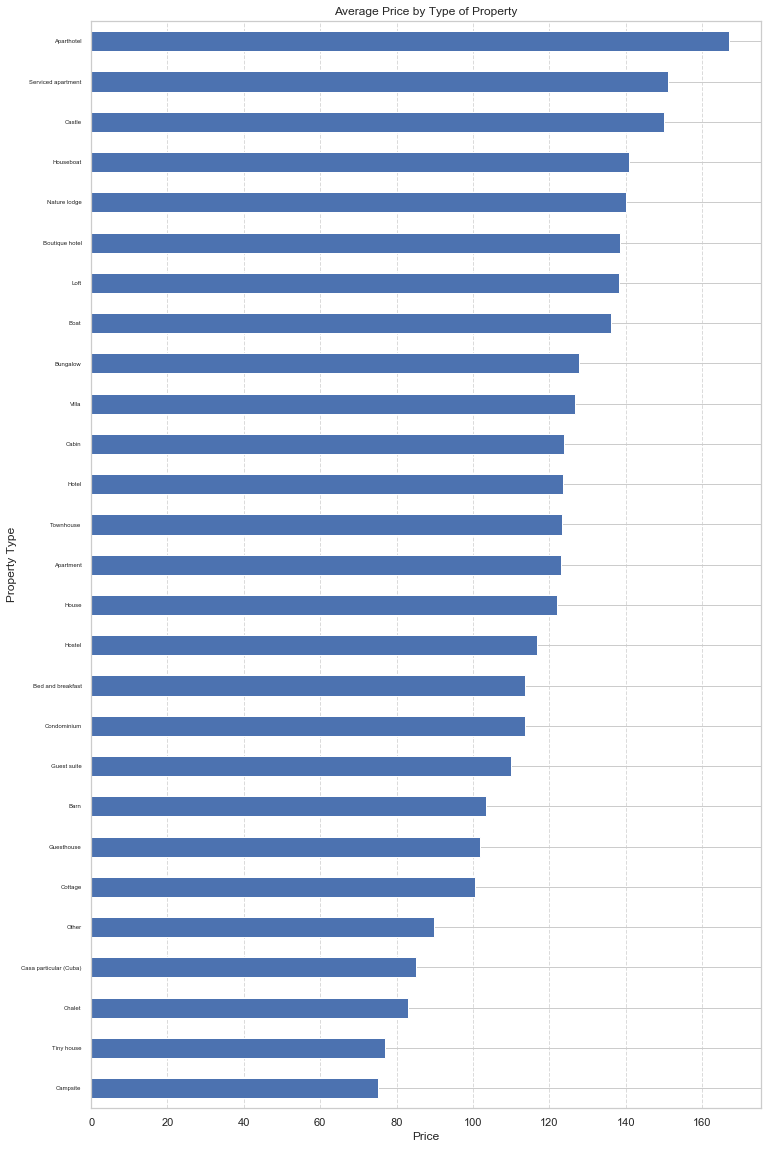

In [85]:
barh = df_property_average.plot(kind='barh', stacked=True, figsize=(12,20))

#layout
plt.yticks(fontsize=6)
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.xlabel('Price')
plt.ylabel('Property Type')
plt.title('Average Price by Type of Property')

Apartments and Houseboats appeal more to the wealthy class while property types like tiny houses are more budget friendly! 

In [30]:
df.corr()

,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
host_response_rate,1.000000,0.122286,0.033229,0.004658,0.010482,-0.012868,0.003701,-0.030210,-0.014236,-0.024801,...,0.066240,0.026716,0.034214,0.060987,0.033497,0.018178,0.023235,0.110353,-0.009473,-0.005330
host_is_superhost,0.122286,1.000000,-0.091805,0.038567,0.019203,-0.049531,-0.004269,-0.053324,-0.039972,-0.016142,...,0.287372,0.202452,0.198227,0.209026,0.162725,0.085750,0.146830,-0.000145,0.039911,0.059050
host_listings_count,0.033229,-0.091805,1.000000,-0.013179,-0.011493,0.019216,0.016866,0.009958,0.001655,-0.008926,...,-0.073682,-0.202156,-0.143421,-0.127562,-0.234144,-0.084668,-0.147463,0.066919,-0.020122,-0.020330
latitude,0.004658,0.038567,-0.013179,1.000000,-0.061001,0.006960,-0.019875,-0.013949,0.024038,0.004765,...,0.046097,0.000765,-0.001948,0.000026,0.005143,-0.035902,-0.005956,0.046159,0.020554,0.018010
longitude,0.010482,0.019203,-0.011493,-0.061001,1.000000,0.060167,-0.017960,0.050384,0.085975,0.023009,...,0.035088,-0.018474,-0.018792,-0.021296,-0.019883,0.020194,-0.005561,0.041267,-0.017314,-0.009206
accommodates,-0.012868,-0.049531,0.019216,0.006960,0.060167,1.000000,0.135388,0.723532,0.820280,0.439897,...,-0.078825,-0.059831,-0.091620,-0.083982,-0.046468,-0.050665,-0.068941,-0.025431,0.003200,0.003355
bathrooms,0.003701,-0.004269,0.016866,-0.019875,-0.017960,0.135388,1.000000,0.146104,0.151063,0.097226,...,-0.009913,0.014576,0.007885,0.011407,0.001940,0.007854,0.003113,-0.006200,0.002849,0.003508
bedrooms,-0.030210,-0.053324,0.009958,-0.013949,0.050384,0.723532,0.146104,1.000000,0.761373,0.408090,...,-0.118129,0.006270,-0.035405,-0.031492,-0.010513,-0.038196,-0.003094,-0.087095,0.012119,0.008785
beds,-0.014236,-0.039972,0.001655,0.024038,0.085975,0.820280,0.151063,0.761373,1.000000,0.384616,...,-0.038911,-0.056349,-0.083528,-0.059404,-0.043947,-0.051026,-0.048503,-0.020183,0.011127,0.008197
price,-0.024801,-0.016142,-0.008926,0.004765,0.023009,0.439897,0.097226,0.408090,0.384616,1.000000,...,-0.113643,0.048404,-0.000476,0.028039,0.013723,0.116778,0.001223,-0.017805,0.000095,0.003401


In [31]:
sub = df[['price', 'review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_value']]

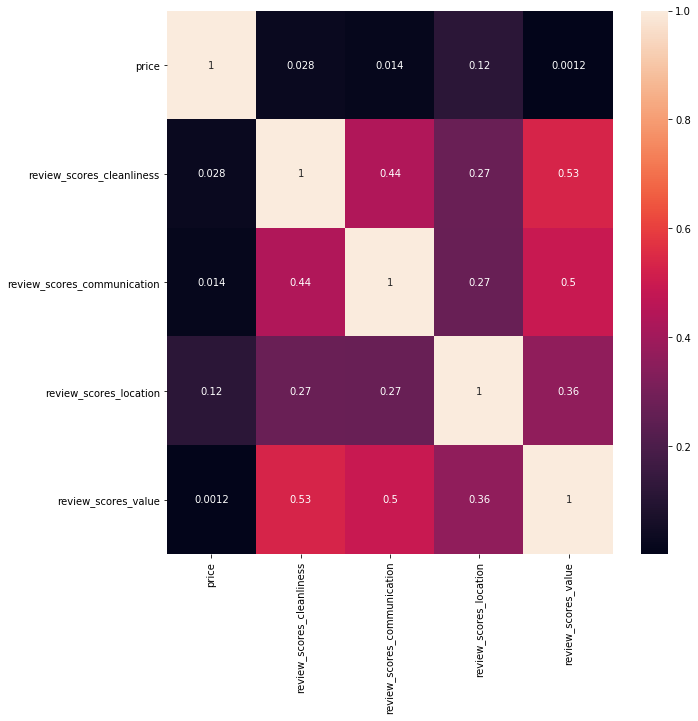

In [32]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There is no strong correlation between price and any of the review factors. However, there is a marginally positive correlation between review of location and price. Locations having more positive reviews are priced higher. The value for money and the communication/ customer service provided is moderately positive. Good communication with clients have boosted the worth for money aspect of the accomodation, as per reviews. Same goes with cleanliness and value.

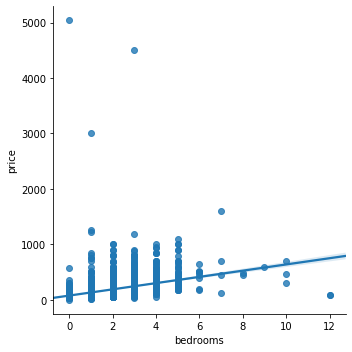

In [33]:
sns.lmplot(x = 'bedrooms', y = 'price', data = df)

There is indeed a positive correlation between the number of bedrooms and price! 

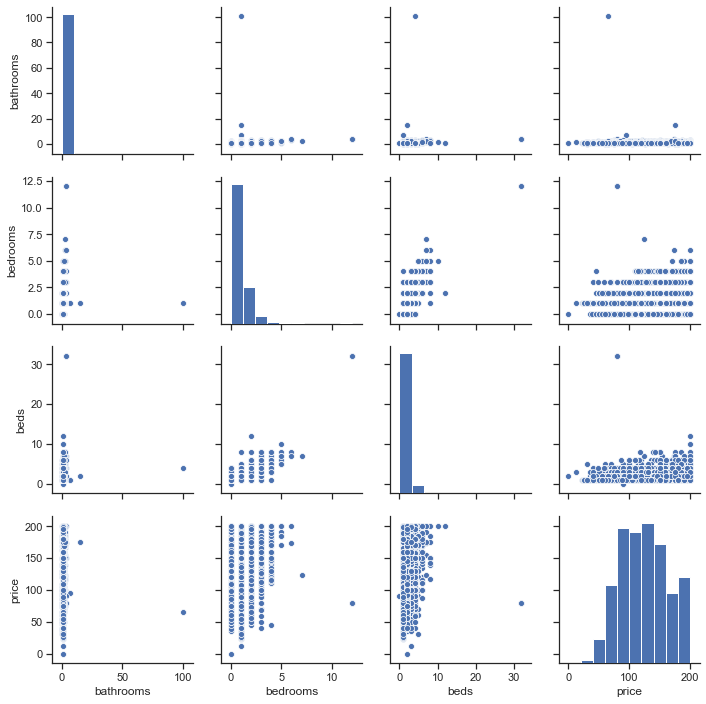

In [68]:
sub_2 = df[['bathrooms', 'bedrooms', 'beds', 'price']]
g = sns.pairplot(sub_2)

The pair plots do not reveal a very strong correlation between the apartment facilities and its price. The only reasonably strong assumption we can make is about the number of bedrooms and the number of beds, which as expected is directly proportional to each other.

In [53]:
df.columns
df = df[df['price'] <= 300.0]

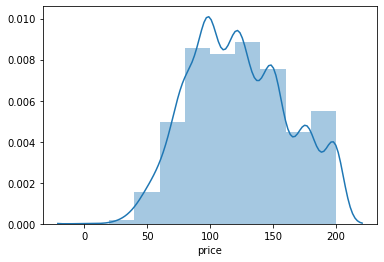

In [55]:
sns.distplot(df['price'], bins = 10, kde = True)

Based on the count of the prices of the rooms, they are divided into 4 categories - Economy (<= 60 dollars) , Middle Class (> 60 & <= 80 dollars), Premium (> 80 & <= 160 dollars) and Luxury (> 160 dollars)

In [56]:
df.loc[df['price'] <= 60, 'Price category'] = 'Economy'
df.loc[(df['price'] > 60) & (df['price'] <= 80), 'Price category'] = 'Middle Class'
df.loc[(df['price'] > 80) & (df['price'] <= 160), 'Price category'] = 'Premium'
df.loc[(df['price'] > 160), 'Price category'] = 'Luxury'

In [57]:
df['Price category'].value_counts(dropna = False)

Premium         5188
Luxury          1412
Middle Class     920
Economy          373
Name: Price category, dtype: int64

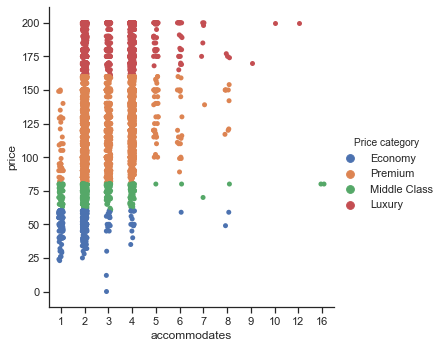

In [60]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="accommodates", y="price", hue="Price category", data=df)

Economy priced accommodations tend to accommodate only a few number of guests (up to 4). As the number of guests increase (from 5 onwards), the places tend to be more Premiuim and Luxury based apartments!

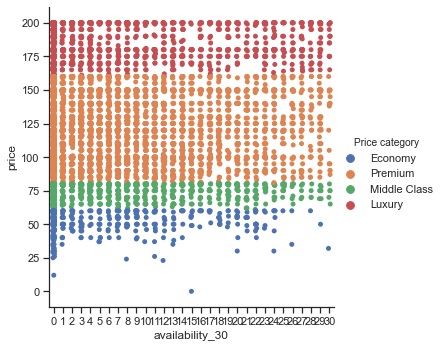

In [63]:
g = sns.catplot(x="availability_30", y="price", hue="Price category", data=df)

Premium and Luxury rooms tend to be available on a longer term basis (~ 30 days) than budget friendly room types like Economy!. Economy class rooms seem to be more popular for shorter durations and not very popular for staying beyond 24 days!

POSSIBLE HYPOTHESIS

- Economy priced accomodations are more popular among customers <br> Accomodations which welcome more guests get better reviews <br> The Availability period is more for entire houses and apartments than it is for private or shared spaces.